# Document Clustering

In [14]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

# The next imports are only needed for the preprocessing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from utils.nlputil import preprocess_text

## Defintion of toy dataset

For this simple example, we define our corpus as a list of documents. Each documents is only a single sentence to keep the example easy to follow. Naturally, a document may contain a large number of sentences.

In [15]:
documents = ["cats and dogs are both domesticated animals.",
             "the domestication of dogs started 10,000 years ago.",
             "dogs were easier to domensticate than cats.",
             "Some people have a dog and a cat (or several dogs and cat) as pets.",
             "the domestication of animals was an important part of human progress.",
             "python is a programming laguage that is easy to learn",
             "python makes text processing rather easy.",
             "a lot of programming languages support text analysis.",
             "programming in python makes the analysis of text easy",
             "nltk is a great nlp package for python."]

## Prepocessing

Preprocessing is not required by LDA, but is often intuitive to, for example, consider the singular and plural forms of nouns as the same term.

In [16]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

The `preprocess_text()` method sllows for all kinds of parameters to affect the preprocessing; see the file `nlputil.py` for more details. You can try different parameters and see the how the documents but also the results of the clustering change.

In [17]:
# Define a list of length len(documents) initialized with empty strings
# (we don't want to override the original documents here)
processed_documents = [''] * len(documents)

for idx, doc in enumerate(documents):
    #processed_documents[idx] = preprocess_text(doc)
    #processed_documents[idx] = preprocess_text(doc, stemmer=porter_stemmer)
    processed_documents[idx] = preprocess_text(doc, lemmatizer=wordnet_lemmatizer)

# Print the processed documents
for doc in processed_documents:
    print (doc)

cat dog domesticated animal
domestication dog start 10000 year ago
dog easy domensticate cat
people dog cat several dog cat pet
domestication animal important part human progress
python programming laguage easy learn
python make text process rather easy
lot program language support text analysis
program python make analysis text easy
nltk great nlp package python


## Generate document term matrix

In [18]:
num_words = 1000 # Top 1000 words

The `TfidfVectorizer` is, among other vectorizers, a handy and flexible way to generate a document term matrix. Mores specifically, here each value in the matrix represents the `tf-idf` value of a term $t_i$ occurs in document $d_j$. The `tf-idf` value of a term $t_i$ in a document $d_j$ is defined as:

$$tfidf(t_i, d_j) = tf(t_i, d_j) \cdot idf(t_i, d_j)$$

with

$$ tf(t_i, d_j) = \frac{number\ of\ times\ t_i\ appears\ in\ d_j}{total\ number\ of\ terms\ in\ d_j} $$

and

$$ idf(t_i, d_j) = \log{\frac{total\ number\ of\ documents}{number\ of\ terms\ containing\ t_i}} $$

The `TfidfVectorizer` class allows for a wide range of useful input parameters to configurate the generation of the document term matrix; In this example, we use the following:

- `max_df`: If not `None` one can specify how often a word has to be in the corpus AT MOST, either in relative terms or in absilute terms. This allows to ingnore words that a very COMMON across all documents and that are not very discriminative.
- `min_df`: If not `None` one can specify how often a word has to be in the corpus AT LEAST, either in relative terms or in absilute terms. This allows to ingnore rare words that a very RARE across all documents and that are not very discriminative.
- `max_features`: If not `None` one can limit the number of words to ones with the highest counts (term frequencies) acroess the whole corpus
- `stop_words`: If not `None` one can specify the list of stop words to be removed from each document (not really necessary if stop words are removed during preprocessing)

The `TfidfVectorizer` accepts more optional input parameters, see here:
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [19]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_words, stop_words='english')

In [20]:
tfidf_model = tfidf_vectorizer.fit_transform(processed_documents)
vocabulary = tfidf_vectorizer.get_feature_names()

In [24]:
vocabulary

['analysis',
 'animal',
 'cat',
 'dog',
 'domestication',
 'easy',
 'make',
 'program',
 'python',
 'text']

### Visualize document term matrix

Just for illustrative purposes, let's print the document term matrix. This is only meaningful for the toy datasets, but highlights the the effects of the different preprocessing options evne before performing the clustering.

In [25]:
from pandas import DataFrame

print(DataFrame(tfidf_model.A, columns=vocabulary).to_string())

   analysis    animal       cat       dog  domestication      easy      make   program    python      text
0  0.000000  0.649509  0.568244  0.505210       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.000000  0.000000  0.000000  0.613968       0.789331  0.000000  0.000000  0.000000  0.000000  0.000000
2  0.000000  0.000000  0.622465  0.553416       0.000000  0.553416  0.000000  0.000000  0.000000  0.000000
3  0.000000  0.000000  0.747341  0.664440       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
4  0.000000  0.707107  0.000000  0.000000       0.707107  0.000000  0.000000  0.000000  0.000000  0.000000
5  0.000000  0.000000  0.000000  0.000000       0.000000  0.707107  0.000000  0.000000  0.707107  0.000000
6  0.000000  0.000000  0.000000  0.000000       0.000000  0.450930  0.579726  0.000000  0.450930  0.507191
7  0.601339  0.000000  0.000000  0.000000       0.000000  0.000000  0.000000  0.601339  0.000000  0.526101
8  0.448315  0.000000  0.000000  0.00

## Perform clustering

### K-Means clutering

In [26]:
from sklearn.cluster import KMeans

In [27]:
num_clusters = 2

In [28]:
km_model = KMeans(n_clusters=num_clusters)
km_model.fit(tfidf_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
for idx, label in enumerate(km_model.labels_):
    print (idx, label)

0 0
1 0
2 0
3 0
4 0
5 1
6 1
7 1
8 1
9 1


### Visalization of clusters

Visualization of clusters is not straightforwards since each document is represented as a multidimensional vecor of the size of the vocabulary (in this simple example: 10 words). To plot the clustering results in a 2d plot requires methods that reduce the dimensionalities down to 2. We consider two approaches:

- Principle Component Analysis (PCA)
- t-distributed Stochastic Neighbor Embedding (t-SNE)

We first need to generate the "dense" document term matrix. Usually, the document term matrix is internally stored as a sparse matrix, i.e., only the matrix elements that are not 0 are presented. In practice, most elements in the matrix are 0, so a sparse representation saves a lot of storage and computation overhead. The methods for dimension reduction require a dense matrix with all elements. The method `todense()` accomplishes this.

In [30]:
X = tfidf_model.todense()

We provide a method `show_clusters_high_dim()` that encapsulates dimensionality reduction the plotting of the custering results into a 2d plot. For more details, the method can be found in the file `utils/plotutil.py`.

In [31]:
from utils.plotutil import show_clusters_high_dim

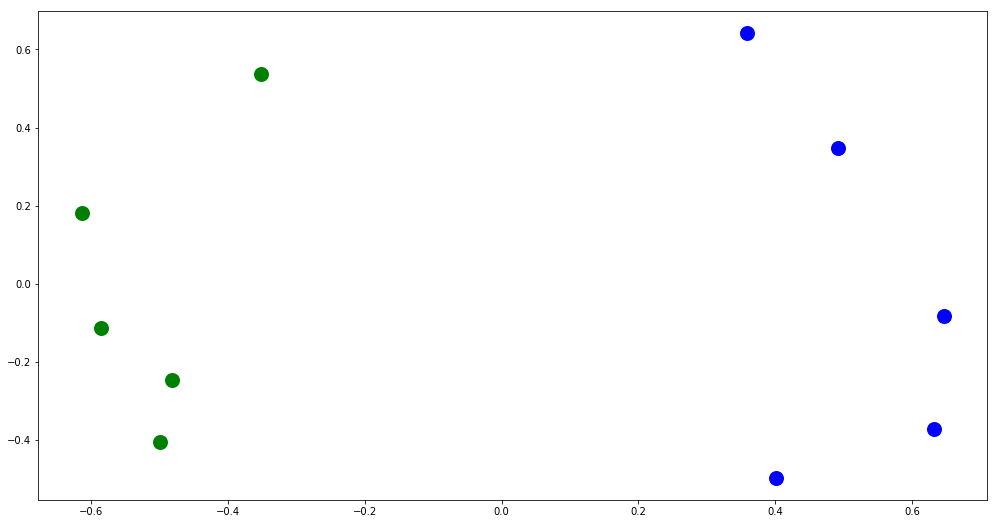

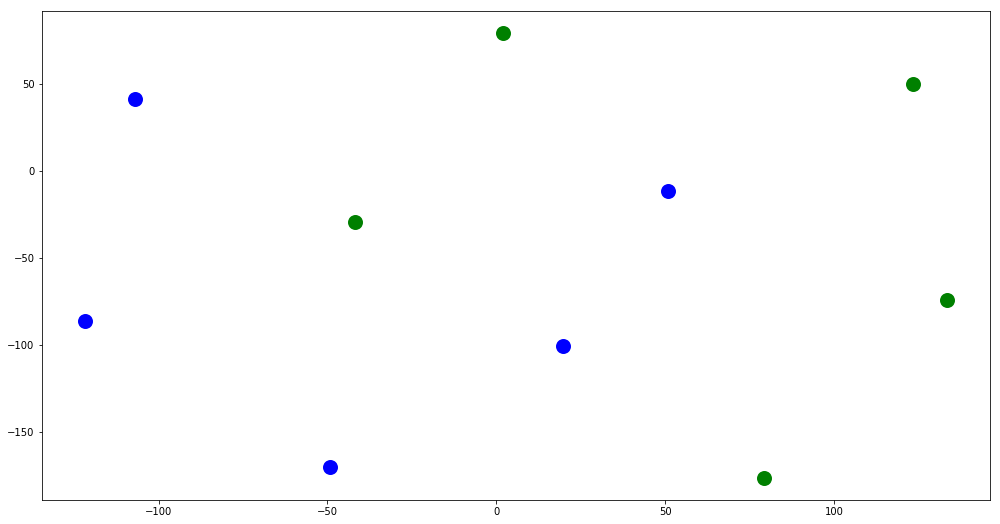

In [32]:
show_clusters_high_dim(km_model, X, method='pca')
show_clusters_high_dim(km_model, X, method='tsne')

### DBSCAN clutering

DBSCAN is another clustering algorithm. In contrast to K-Means, there is no need to specify the number of cluster a-priory. DBSCAN tries to find data points that are more "densely packed". The degree of density has to be defined by th user.

In [33]:
from sklearn.cluster import DBSCAN

Let's run DBSCAN over our toy dataset. The parameter `eps` specifies the degree of density. You can change the value and see its effct. In fact, I tried various value to find the cluster that match our expectations.

In [34]:
dbscan_model = DBSCAN(eps=0.6, min_samples=2, metric='cosine', algorithm='brute')
dbscan_model.fit(tfidf_model)
print (dbscan_model.labels_)

labels = dbscan_model.labels_

# Number of clusters in labels, ignoring noise if present.
dbscan_num_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

[0 0 0 0 0 1 1 1 1 1]


### Find a good value of k for k-Means

In [35]:
range_num_clusters = [2, 3, 4, 5, 6, 7, 8]

In [36]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

for num_clusters in range_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=10)
    km.fit(tfidf_model)
    labels = km.labels_
    silhouette_avg = silhouette_score(tfidf_model, labels)
    print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.2586881474582192
For n_clusters = 3 The average silhouette_score is : 0.29482588983015334
For n_clusters = 4 The average silhouette_score is : 0.298891511247888
For n_clusters = 5 The average silhouette_score is : 0.24866097786240554
For n_clusters = 6 The average silhouette_score is : 0.18715441835779173
For n_clusters = 7 The average silhouette_score is : 0.13140081779501417
For n_clusters = 8 The average silhouette_score is : 0.0755136527825371


## Application use case: news article headlines

In this example, we apply k-Means clustering over a list of 12,394 news article headlines from TechCrunch (https://techcrunch.com/). This dataset is publicly available on Kaggle (https://www.kaggle.com/), see the full link here:

- https://www.kaggle.com/PromptCloudHQ/titles-by-techcrunch-and-venturebeat-in-2017



### Load news article headlines from CSV file

`pandas` is a very popular package for handling structured files like CSV files.

In [37]:
df = pd.read_csv('data/news-articles/news-article-headlines-techcrunch.csv', encoding = "ISO-8859-1")

# Remove rows where Title is "NaN" to avoid any errors later on
df = df[pd.notnull(df['title'])]

# Extract list of headline from data frame
news_headlines = df['title'].tolist()

# Print the first 5 headlines
df.head()

,title,url,date
0,Gaming firm Razer seeks to raise over $600M in...,https://techcrunch.com/2017/07/01/razer-hong-k...,1-Jul-17
1,Mendel.ai nabs $2 million to match cancer pati...,https://techcrunch.com/2017/07/01/mendel-ai-na...,1-Jul-17
2,These cities in Californias East Bay are raki...,https://techcrunch.com/2017/07/01/these-east-b...,1-Jul-17
3,A walk around Station F with Emmanuel Macron,https://techcrunch.com/2017/07/01/a-walk-aroun...,1-Jul-17
4,Crunch Report | Facebook Helps You Find Wi-Fi,https://techcrunch.com/2017/06/30/crunch-repor...,30-Jun-17


### Processing

Again, we normalize each docment by converting all words to lowercase, remove stopwords, and lemmatize each word

In [38]:
processed_news_headlines = [''] * len(news_headlines)

for idx, doc in enumerate(news_headlines):
    #processed_news_headlines[idx] = preprocess_text(doc)
    #processed_news_headlines[idx] = preprocess_text(doc, stemmer=porter_stemmer)
    processed_news_headlines[idx] = preprocess_text(doc, lemmatizer=wordnet_lemmatizer)

### Generate document term matrix

Analogously to the steps above, we generate the feature set for the clustering as document term matrix with the tf-idf score being the matrix entries

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, max_features=num_words, stop_words='english')

tfidf_model_news = tfidf_vectorizer.fit_transform(processed_news_headlines)

print(tfidf_model_news.shape)

vocabulary = tfidf_vectorizer.get_feature_names()

(12394, 1000)


With the data, we can now run k-Means with different values for k. For each result, we can then calculate the silhouette score.

In [40]:
silhouette_scores = []
for num_clusters in [5,10]:
#for num_clusters in [5,10,20,30,40,50]:
    kmeans = KMeans(n_clusters=num_clusters, random_state=10)
    kmeans.fit(tfidf_model_news)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(tfidf_model_news, labels)
    silhouette_scores.append(silhouette_avg)
    print("k-Mean for k={} done".format(num_clusters))

k-Mean for k=5 done
k-Mean for k=10 done


Since we stored all silhouette scores in a list, we can simply plot the corresponding graph.

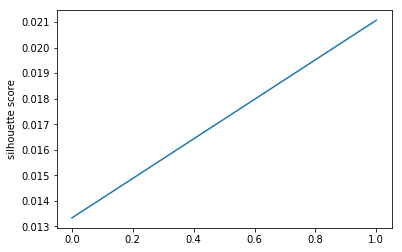

In [41]:
from matplotlib import pyplot as plt

plt.plot(silhouette_scores)
plt.ylabel('silhouette score')
plt.show()

Lastly, let's perform the k-Means with k=20 to visualize again the result using PCA.

In [42]:
km_model = KMeans(n_clusters=20)
km_model.fit(tfidf_model_news)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
X = tfidf_model_news.todense()

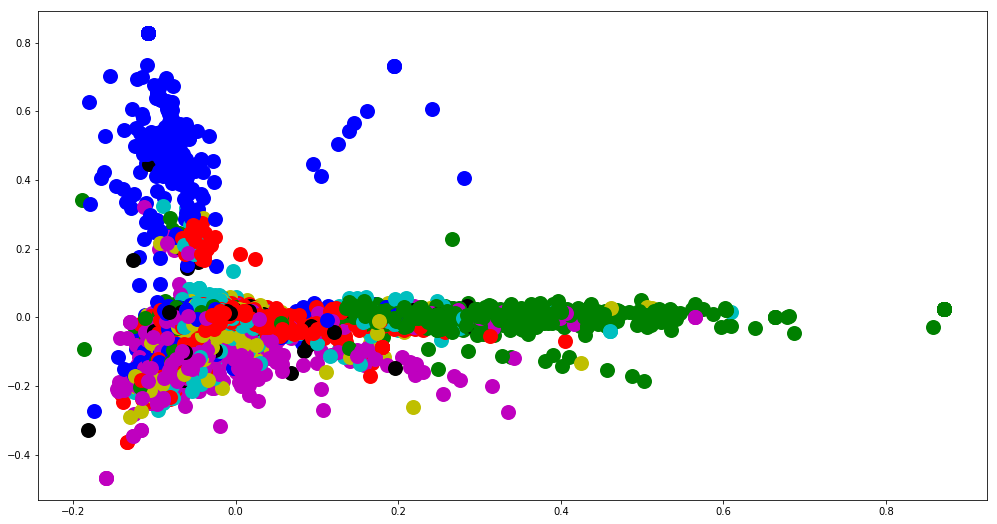

In [44]:
show_clusters_high_dim(km_model, X, method='pca')
#show_clusters_high_dim(km_model, X, method='tsne')  # Takes much longer to compute